# importation des bibliothèques

In [15]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import math
from astropy.coordinates import SkyCoord
from astropy.coordinates import angular_separation
from astropy.coordinates import Angle, Latitude, Longitude
import astropy.units as u
from astropy.coordinates import EarthLocation, AltAz
from astropy.time import Time
from astropy.time import TimeDelta
from astropy.modeling import models, fitting
import pandas as pd
from mpl_toolkits import mplot3d
import plotly
import plotly.graph_objs as go
import plotly.express as px
import astroplan
from astroplan import Observer
from astroplan import download_IERS_A
from astroplan import FixedTarget
from scipy.optimize import curve_fit
from skspatial.objects import Plane
from skspatial.objects import Points
from skspatial.plotting import plot_3d

def SideralTime(timeentry):
	PicduMidi = EarthLocation(lat=42.936*u.deg, lon=+0.143*u.deg, height=2877*u.m)
	t = Time(timeentry, scale='utc', location = PicduMidi)
	sideraltime = t.sidereal_time('mean') 
	return sideraltime

PicduMidi = EarthLocation(lat=42.936*u.deg, lon=+0.143*u.deg, height=2877*u.m)

plotly.offline.init_notebook_mode()




# A n'executer qu'une fois pour lire les résultats du fichier results et pouvoir le nettoyer

In [3]:
file=open("E:\\GPH\\FRANCE\\Stage\\CODE\\results.txt","r")

### Ajout de la position d'étoiles observées
BetaCrB = FixedTarget.from_name('Beta CrB')
HD141004 = FixedTarget.from_name('HD 141004')
GJ9520 = FixedTarget.from_name('GJ 9520')
V889Her = FixedTarget.from_name('V889 Her')
RSct = FixedTarget.from_name('R Sct')
AZCyg = FixedTarget.from_name('AZ Cyg')
CygA61 = FixedTarget.from_name('61 Cyg A')
HNPeg = FixedTarget.from_name('HN Peg')
GJ873 = FixedTarget.from_name('GJ 873')
HD3651 = FixedTarget.from_name('HD 3651')
GamEqu = FixedTarget.from_name('Gamma Equ')
HD185144 = FixedTarget.from_name('HD 185144')
PZCas = FixedTarget.from_name('PZ Cas')
SUPer = FixedTarget.from_name('SU Per')
KappaCeti = FixedTarget.from_name('Kappa Ceti')
AFLep = FixedTarget.from_name('AF Lep')
CETau = FixedTarget.from_name('CE Tau')
UMon = FixedTarget.from_name('U Mon')
Pollux = FixedTarget.from_name('Pollux')
HD75332 = FixedTarget.from_name('HD 75332')
TYC38141598 = FixedTarget.from_name('TYC 3814-1598-1')
HD101501 = FixedTarget.from_name('HD 101501')
TYC284358 = FixedTarget.from_name('TYC 284-358-1')
TYC3458611 = FixedTarget.from_name('TYC 3458-611-1')
Aur19 = FixedTarget.from_name('19 Aur')
Betelgeuse = FixedTarget.from_name('Betelgeuse')
HD86170 = FixedTarget.from_name('HD 86170')
TYC1406971 = FixedTarget.from_name('TYC 1406-971-1')
TYC286299 = FixedTarget.from_name('TYC 286-299-1')
V1358Ori = FixedTarget.from_name('V1358 Ori')
TYC30061127 = FixedTarget.from_name('TYC 3006-1127-1')
TYC24572294 = FixedTarget.from_name('TYC 2457-2294-1')
MJ05402650 = FixedTarget.from_name('2MASS J05402650-0146510')
TYC877422 = FixedTarget.from_name('TYC 877-422-1')
RhoCyg = FixedTarget.from_name('Rho Cyg')
BetaAnd = FixedTarget.from_name('Beta And')
MJ05415050 = FixedTarget.from_name('2MASS J05415050-0153153')
MJ05415140 = FixedTarget.from_name('2MASS J05415140-0229512')
UpsAnd = FixedTarget.from_name('Upsilon And')
UpsPer = FixedTarget.from_name('Upsilon Per')
AlfAri = FixedTarget.from_name('Alpha Ari')
HD18410 = FixedTarget.from_name('HD 18410')
TYC33101808 = FixedTarget.from_name('TYC 3310-1808-1')
HD28238 = FixedTarget.from_name('HD 28238')
MJ05425881 = FixedTarget.from_name('2MASS J05425881-0218370')
RZAri = FixedTarget.from_name('RZ Ari')
TVGem = FixedTarget.from_name('TV Gem')
TYC3165381 = FixedTarget.from_name('TYC 3165-381-1')
MJ05334890 = FixedTarget.from_name('2MASS J05334890-0226082')
V362Aur = FixedTarget.from_name('V362 Aur')
MUCep = FixedTarget.from_name('MU Cep')
HD11140 = FixedTarget.from_name('HD 11140')
MJ05412450 = FixedTarget.from_name('2MASS J05412450-0222362')
HD49198 = FixedTarget.from_name('HD 49198')
HD48522 = FixedTarget.from_name('HD 49522')
HD76151 = FixedTarget.from_name('HD 76151')
HD78366 = FixedTarget.from_name('HD 78366')
HD75332 = FixedTarget.from_name('HD 75332')
HD101501 = FixedTarget.from_name('HD 101501')
HD185144 = FixedTarget.from_name('HD185144')
TauBoo = FixedTarget.from_name('Tau Boo')
KsiBoo = FixedTarget.from_name('Ksi Boo')
TYC3121416 = FixedTarget.from_name('TYC 312-1416-1')
TYCTYC322491 = FixedTarget.from_name('TYC322_49_1')
Regulus = FixedTarget.from_name('Regulus')
AlfHer = FixedTarget.from_name('Alpha Her')
ChiCyg = FixedTarget.from_name('Chi Cyg')
RLeo = FixedTarget.from_name('R Leo')
TYC91910841 = FixedTarget.from_name('TYC919_1084_1')
V669Her = FixedTarget.from_name('V669 Her')
RAql = FixedTarget.from_name('R Aql')
ADLeo = FixedTarget.from_name('AD_leo')
RVir = FixedTarget.from_name('R_Vir')
peg51 = FixedTarget.from_name('51Peg')
vega = FixedTarget.from_name('vega')

array = file.readlines()
file.close()
targets = [BetaCrB,HD141004,GJ9520,V889Her,RSct,AZCyg,CygA61,HNPeg,GJ873,HD3651,GamEqu,HD185144,PZCas,SUPer,
           KappaCeti,AFLep,CETau,UMon,Pollux,HD75332,TYC38141598,HD101501,TYC284358,TYC3458611,Aur19,
           Betelgeuse,HD86170,TYC1406971,TYC286299,V1358Ori,TYC30061127,TYC24572294,MJ05402650,TYC877422,
           RhoCyg,BetaAnd,MJ05415050,MJ05415140,UpsAnd,UpsPer,AlfAri,HD18410,TYC33101808,HD28238,HD185144,
           MJ05425881,RZAri,TVGem,TYC3165381,MJ05334890,V362Aur,MUCep,HD11140,MJ05412450,HD49198,HD48522,
           HD76151,HD78366,HD75332,HD101501,TauBoo,KsiBoo,TYC3121416,Regulus,AlfHer,ChiCyg,RLeo,TYC91910841,V669Her,RAql,ADLeo,
           RVir,vega]

delta_ra = np.zeros(len(array), dtype=np.float64)

delta_dec = np.zeros(len(array), dtype=np.float64)
dist = np.zeros(len(array), dtype=np.float64)
astrometry_targetaltaz = np.zeros(len(array), dtype=np.float64)
astrometry_az = np.zeros(len(array), dtype=np.float64)
astrometry_ha = np.zeros(len(array), dtype=np.float64)
disth = np.zeros(len(array), dtype=np.float64)
dista = np.zeros(len(array), dtype=np.float64)
phi_list = np.zeros(len(array), dtype=np.float64)
phi_count = 0

### Création du ficher _out qui contient toutes les infos (# <DATE>: Measure at <UT>, RA_center(deg) DEC_center (deg) STAR_NAME STAR_RA STAR_DEC, etc.)
FILEOUT = open("E:\\GPH\\FRANCE\\Stage\\CODE\\results_out_vieux.txt","w")
FILEOUT.write('# <DATE>: Measure at <UT>, RA_center(deg) DEC_center (deg) STAR_NAME STAR_RA STAR_DEC ')
FILEOUT.write(' STAR_HA STAR_ALT DISTANCE DELTA_RA DELTA_DEC STAR_AZ \n')
                             
for i in range(0,len(array)):
    
    fields = array[i].split()
    string = fields[0].replace(':',' ') + fields[3].replace(',','')
    astrometry_time = Time([string])
    hourstring = str(astrometry_time)
    hours = hourstring.split()
    astrometry_coordinate = SkyCoord(fields[4],fields[5], unit='deg', frame='icrs')
    lst = SideralTime(astrometry_time)
    ha = lst - astrometry_coordinate.ra
    astrometry_ha[i] = np.float64(ha.wrap_at(12 * u.h).hourangle)
    targetaltaz = astrometry_coordinate.transform_to(AltAz(obstime=astrometry_time,location=PicduMidi))
    astrometry_targetaltaz[i] = targetaltaz.alt.deg
    astrometry_az[i] = targetaltaz.az.deg

    for j in range(0,len(targets)):
        dra =  astrometry_coordinate.ra.deg  - targets[j].ra.deg
        ddec =  astrometry_coordinate.dec.deg  - targets[j].dec.deg

        if np.abs(dra) < 2 and np.abs(ddec) < 2:
            delta_ra[i] = dra
            delta_dec[i] = ddec
            phi_list[i] = np.arccos(
                          (np.sin(dra*np.cos(targets[j].dec.rad))*np.cos(ddec))
                          - np.cos(dra*np.cos(targets[j].dec.rad))*np.sin(ddec)*((np.cos(np.pi/180)-np.cos(dra*np.cos(targets[j].dec.rad)*np.cos(ddec)))
                          /(np.sin(dra*np.cos(targets[j].dec.rad))
                          *np.sin(ddec)))
                          /np.sin(np.pi/180))
            
            dist[i] = np.sqrt((dra*dra)*np.cos((targets[j].dec.deg)*np.pi/180)
                      *np.cos((targets[j].dec.deg)*np.pi/180)+(ddec*ddec))
            FILEOUT.write(fields[0]+' '+' '+fields[1]+' '+fields[2]+' '+hours[1].replace(',','').replace(']','').replace("'",'').replace('.000','')+', ')
            FILEOUT.write(fields[4]+' '+fields[5]+' '+targets[j].name.replace(' ','_')+' ')
            FILEOUT.write(str(targets[j].ra.deg)+' '+str(targets[j].dec.deg)+' ')
            FILEOUT.write(str(astrometry_ha[i])+' '+str(astrometry_targetaltaz[i])+' '+str(dist[i])+' '+ str(delta_ra[i]) +' '+ str(delta_dec[i]) +' '+ str(astrometry_az[i])+'\n')
   
FILEOUT.close()

filtRA = delta_ra[:]<0
filtDEC = delta_dec[:]>0


KeyboardInterrupt: 

# Lire le fichier results_clean.txt

In [16]:
###Lecture du fichier _out
i=0
FILE=open("E://GPH//FRANCE//Stage//CODE//results_out_vieux_clean.txt")
arrayclean=FILE.readlines()
FILE.close()

anglehorair = []#np.zeros(len(arrayclean)-1,dtype=np.float64)
altitud =  []#np.zeros(len(arrayclean)-1,dtype=np.float64)
separatio = []  #np.zeros(len(arrayclean)-1,dtype=np.float64)
RA_me = []
RA_tru = []
DEC_me = []
DEC_tru = []
anglehoraire_true = np.zeros(len(arrayclean)-1,dtype=np.float64)
altitude_true =  np.zeros(len(arrayclean)-1,dtype=np.float64)
astrometry_alt_mes = np.zeros(len(arrayclean)-1, dtype=np.float64)
astrometry_az_mes = np.zeros(len(arrayclean)-1, dtype=np.float64)
astrometry_alt_ofi = np.zeros(len(arrayclean)-1, dtype=np.float64)
astrometry_az_ofi = np.zeros(len(arrayclean)-1, dtype=np.float64)

for i in range (1,len(arrayclean)):
    fields = arrayclean[i].split()
    string = fields[0].replace(':',' ') + fields[3].replace(',','')
    astrometry_time = Time([string])

    astrometry_coordinate_mes = SkyCoord(fields[4],fields[5], unit='deg', frame='icrs')
    astrometry_coordinate_ofi = SkyCoord(fields[7],fields[8], unit='deg', frame='icrs')

    targetaltaz_mes = astrometry_coordinate_mes.transform_to(AltAz(obstime=astrometry_time,location=PicduMidi))
    targetaltaz_ofi = astrometry_coordinate_ofi.transform_to(AltAz(obstime=astrometry_time,location=PicduMidi))
    
    astrometry_alt_mes[i-1] = targetaltaz_mes.alt.deg
    astrometry_az_mes[i-1] = targetaltaz_mes.az.deg
    astrometry_alt_ofi[i-1] = targetaltaz_ofi.alt.deg
    astrometry_az_ofi[i-1] = targetaltaz_ofi.az.deg
    
    anglehorair.append(fields[9])
    altitud.append(fields[10])
    separatio.append(fields[11])
    RA_me.append(fields[4])
    RA_tru.append(fields[7])
    DEC_me.append(fields[5])
    DEC_tru.append(fields[8])
    lst = SideralTime(astrometry_time)
    ha_offi = lst - astrometry_coordinate_ofi.ra
    anglehoraire_true[i-1] = np.float64(ha_offi.wrap_at(12 * u.h).hourangle)
    altitude_true[i-1] = astrometry_alt_ofi[i-1]



beta moy 0.4988789502332025
omega moy 0.0194983353801154
diff dec moy = -0.529236840624509
diff RA moy = 0.9866310480429823


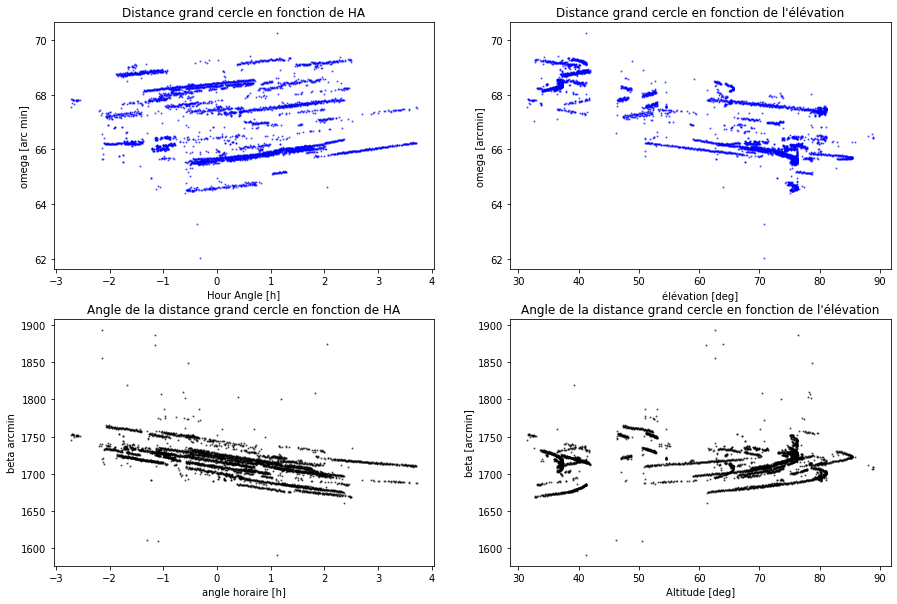

In [17]:
anglehoraire = np.zeros(len(anglehorair),dtype=np.float64)
altitude =  np.zeros(len(anglehorair),dtype=np.float64)

separation = np.zeros(len(anglehorair),dtype=np.float64)
RA_mes = np.zeros(len(anglehorair),dtype=np.float64)
RA_true = np.zeros(len(anglehorair),dtype=np.float64)
DEC_mes = np.zeros(len(anglehorair),dtype=np.float64)
DEC_true = np.zeros(len(anglehorair),dtype=np.float64)
omeg = np.zeros(len(anglehorair),dtype=np.float64)
bet = np.zeros(len(anglehorair),dtype=np.float64)
omega = np.zeros(len(anglehorair),dtype=np.float64)
beta = np.zeros(len(anglehorair),dtype=np.float64)
diff_RA = np.zeros(len(anglehorair),dtype=np.float64)
diff_DEC = np.zeros(len(anglehorair),dtype=np.float64)

   
for i in range (0,len(anglehorair)):
    #Met les variables en np array (plus commode)
    anglehoraire[i] = np.float64(anglehorair[i])
    altitude[i] = np.float64(altitud[i])    
    separation[i] = np.float64(separatio[i])
    RA_mes[i] = np.float64(RA_me[i])
    RA_true[i] = np.float64(RA_tru[i])
    DEC_mes[i] = np.float64(DEC_me[i])
    DEC_true[i] = np.float64(DEC_tru[i])

    #Calcul trigo de la distance grand cercle (omega) qui sépare le centre de la caméra et le cassegrain
    omeg[i] = np.arccos(np.sin(DEC_true[i] * np.pi/180) * np.sin(DEC_mes[i] * np.pi/180) 
              + np.cos(DEC_true[i] * np.pi/180) * np.cos(DEC_mes[i] * np.pi/180) 
              * np.cos(RA_true[i] * np.pi/180 - RA_mes[i] * np.pi/180)) 
    #Calcul trigo de l'angle entre 
    bet[i] = np.arccos(np.sin(RA_true[i] * np.pi/180 - RA_mes[i] * np.pi/180) 
             * np.cos(DEC_mes[i] * np.pi/180) / np.sin(omeg[i]))
    #Calcul des différences RA et DEC entre la valeur du catalogue et celle mesurée 
    diff_RA[i] = (RA_true[i] - RA_mes[i])* np.cos(DEC_true[i]*np.pi/180)  
    diff_DEC[i] = DEC_true[i] - DEC_mes[i]

omega_moy = np.average(abs(omeg))
beta_moy = np.average(abs(bet))
omega = omeg #- omega_moy
beta = bet #- beta_moy
diff_dec_moy = np.average((diff_DEC))
diff_RA_moy = np.average((diff_RA))


plt.figure(figsize=(15,10))

print('beta moy', beta_moy)
print('omega moy', omega_moy)
print('diff dec moy =', diff_dec_moy)
print('diff RA moy =', diff_RA_moy)
xHA = np.linspace(-3,4,len(anglehorair))
xALT = np.linspace(35,90,len(anglehorair))
xRA = np.linspace(0,370,len(RA_mes))
xDEC = np.linspace(-10,70,len(DEC_mes))

### Les Graphs prennent l'altitude et l'angle horaire réel de l'étoile (celle du catalogue)
fig = plt.subplot(2,2,1)
plt.title('Distance grand cercle en fonction de HA')
#plt.ylim(-3,3)
plt.scatter(anglehoraire_true,omega*3437.75,s=5,marker='.',c='blue', alpha=0.5)
plt.xlabel('Hour Angle [h]')
plt.ylabel('omega [arc min]')

fig = plt.subplot(2,2,2)
plt.title("Distance grand cercle en fonction de l'élévation")
plt.scatter(altitude_true, omega*3437.75,s=5,marker='.',c='blue', alpha=0.5)
plt.xlabel('élévation [deg]')
plt.ylabel('omega [arcmin]')


fig = plt.subplot(2,2,3)
plt.title('Angle de la distance grand cercle en fonction de HA')
plt.scatter(anglehoraire_true, beta *3437.75,s=5,marker='.',c='black', alpha=0.5)
plt.xlabel('angle horaire [h]')
plt.ylabel('beta arcmin')

fig = plt.subplot(2,2,4)
plt.title("Angle de la distance grand cercle en fonction de l'élévation")
plt.scatter(altitude_true,beta*3437.75,s=5,marker='.',c='black', alpha=0.5)
plt.xlabel('Altitude [deg]')
plt.ylabel('beta [arcmin]')

plt.show()




In [18]:

###BETA###
xaltitude = np.linspace(30,90,len(altitude))
xanglehoraire = np.linspace(-3,4,len(anglehoraire))
trace = go.Scatter3d(
    x=altitude_true,  # <-- Put your data instead
    y=anglehoraire_true,  # <-- Put your data instead
    z=beta*3437.75,  # <-- Put your data instead
    mode='markers',
    marker={'size': 3,'opacity': 0.8,'color':beta*3437.75, 'colorscale':'Viridis'}
    
)

layout = go.Layout(
    margin={'l': 0, 'r': 0, 'b': 0, 't': 0}
)
data = [trace]
plot_figure = go.Figure(data=data, layout=layout)

plotly.offline.iplot(plot_figure)

In [19]:
###OMEGA###

trace = go.Scatter3d(
    x=altitude_true,  # <-- Put your data instead
    y=anglehoraire_true,  # <-- Put your data instead
    z=omega*3437.75,  # <-- Put your data instead
    mode='markers',
    marker={'size': 3,'opacity': 0.8,'color':omega*3437.75, 'colorscale':'Viridis'})
surface = go.Surface(x=xaltitude, y=xanglehoraire, z=[omega*3437.75], showscale=False)
layout = go.Layout(margin={'l': 0, 'r': 0, 'b': 0, 't': 0})
data = [trace,surface]
plot_figure = go.Figure(data=data, layout=layout)

plotly.offline.iplot(plot_figure)

Plane(point=Point([61.30896658,  0.34470768, 67.03040245]), normal=Vector([0.05988904, 0.03346892, 0.99764379]))


(<Figure size 432x288 with 1 Axes>, <Axes3DSubplot:>)

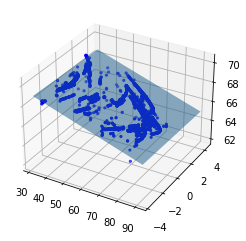

In [20]:

list_of_list_omega = []
for i in range(len(anglehoraire)):
    list_of_list_omega.append([altitude_true[i],anglehoraire_true[i],omega[i]*3437.75])
    
    
points = Points(list_of_list_omega)

plane = Plane.best_fit(points)

print(plane)
plot_3d(
    points.plotter(c='b', s=5, depthshade=True),
    plane.plotter(alpha=0.5,lims_x=(-30, 30), lims_y=(-4, 4))
)

Plane(point=Point([6.13089666e+01, 3.44707684e-01, 1.71502111e+03]), normal=Vector([-0.00809101,  0.99926714,  0.03741269]))


(<Figure size 432x288 with 1 Axes>, <Axes3DSubplot:>)

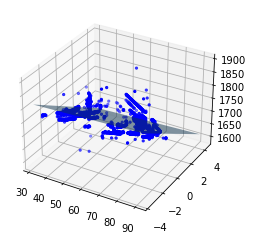

In [21]:
###Beta
list_of_list_beta = []
for i in range(len(anglehoraire)):
    list_of_list_beta.append([altitude_true[i],anglehoraire_true[i],beta[i]*3437.75])
    
    
points = Points(list_of_list_beta)

plane = Plane.best_fit(points)

print(plane)
plot_3d(
    points.plotter(c='b', s=5, depthshade=True),
    plane.plotter(alpha=0.5,lims_x=(-30, 30), lims_y=(-4, 4))
)

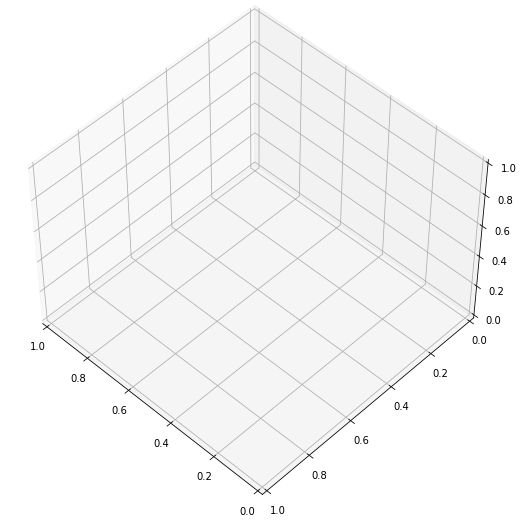

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Though the following import is not directly being used, it is required
# for 3D projection to work with matplotlib < 3.2
import mpl_toolkits.mplot3d  # noqa: F401
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn.preprocessing import scale
import sklearn.metrics as sm
from sklearn.metrics import confusion_matrix,classification_report
X = scale(list_of_list_omega)

clustering = [("k_means_iris_3", KMeans(n_clusters=2,random_state=10))]

data_df = pd.DataFrame(list_of_list_omega)
data_df.columns= ['élévation', 'anglehoraire','distance']
color_theme = np.array(['darkgray','lightsalmon','powderblue'])



fignum = 1
titles = ["3 clusters"]
for name, est in clustering:
    fig = plt.figure(fignum, figsize=(10, 9))
    ax = fig.add_subplot(111, projection="3d", elev=48, azim=134)
    est.fit(X)
    labels = est.labels_
    figure = go.Scatter3d(
    x=X[:, 0],  # <-- Put your data instead
    y=X[:, 1],  # <-- Put your data instead
    z=X[:, 2],  # <-- Put your data instead
    mode='markers',
    marker={'size': 3,'opacity': 0.8,'color':labels.astype(float)})
data = [figure]
plot_figure = go.Figure(data=data)

plotly.offline.iplot(plot_figure)

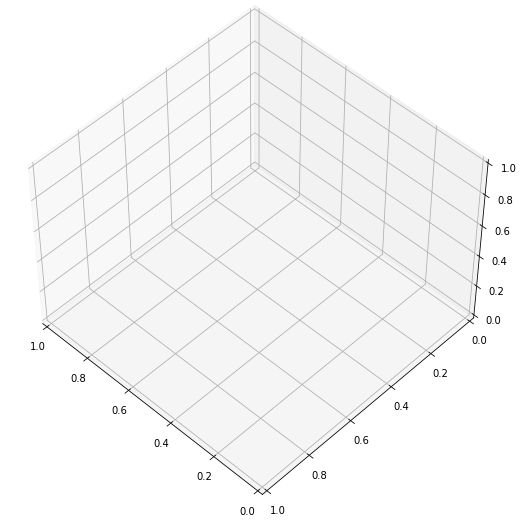

In [24]:
###BETA


import numpy as np
import matplotlib.pyplot as plt

# Though the following import is not directly being used, it is required
# for 3D projection to work with matplotlib < 3.2
import mpl_toolkits.mplot3d  # noqa: F401
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn.preprocessing import scale
import sklearn.metrics as sm
from sklearn.metrics import confusion_matrix,classification_report
X = scale(list_of_list_beta)
clustering = [("k_means_iris_3", KMeans(n_clusters=2,random_state=10))]

data_df = pd.DataFrame(list_of_list_beta)
data_df.columns= ['élévation', 'anglehoraire','distance']




fignum = 1
titles = ["3 clusters"]
for name, est in clustering:
    fig = plt.figure(fignum, figsize=(10, 9))
    ax = fig.add_subplot(111, projection="3d", elev=48, azim=134)
    est.fit(X)
    labels = est.labels_
    figure = go.Scatter3d(
    x=X[:, 0],  # <-- Put your data instead
    y=X[:, 1],  # <-- Put your data instead
    z=X[:, 2],  # <-- Put your data instead
    mode='markers',
    marker={'size': 3,'opacity': 0.8,'color':labels.astype(float)})
data = [figure]
plot_figure = go.Figure(data=data)

plotly.offline.iplot(plot_figure)

c:\Users\Utilisateur\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\optimize\_minpack_py.py:833: OptimizeWarning:

Covariance of the parameters could not be estimated



[ 6.15471072e-04 -7.25445178e-01  8.95414016e-06 -2.83555675e-02] [ 3.23273167e-06  6.64719216e-02 -4.36173401e-02  7.49783639e+00]


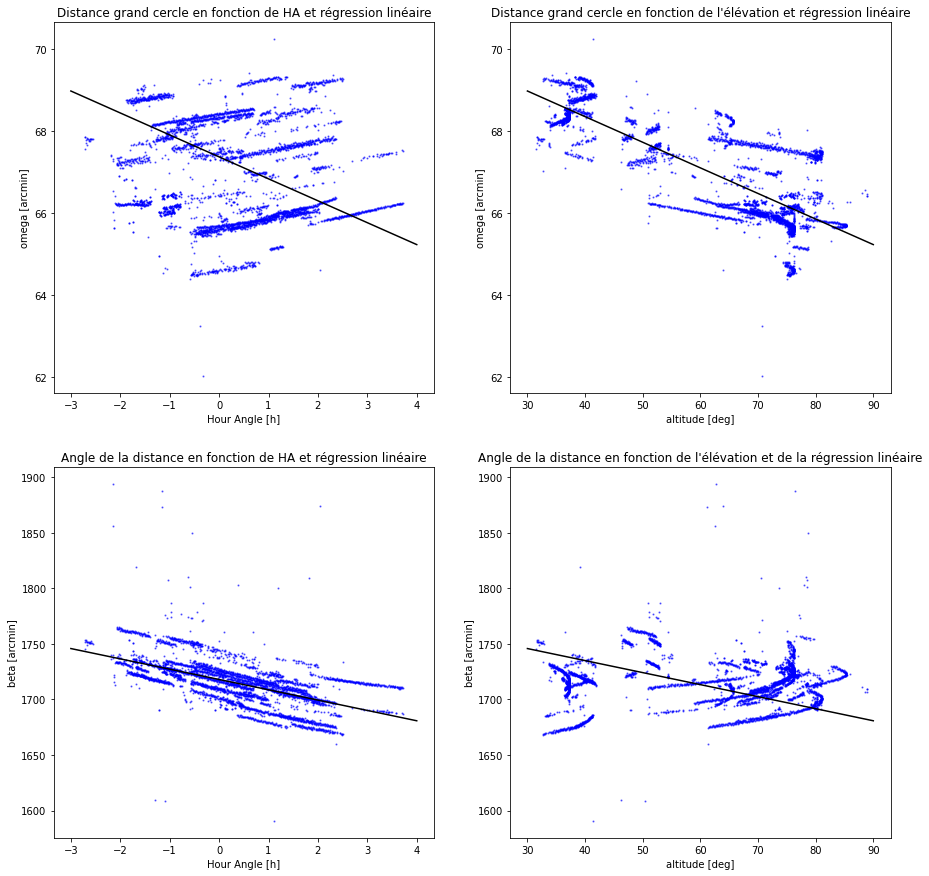

In [25]:
### Traçage des régressions linéaires des précédents graphiques

def omega_alt_AH(data,a,b,c,d):
    alt,AH = data
    return ((a*alt+b)*(c*AH+d))#((0.00465611*(alt-74.46279478) - 0.07998795*(AH - 0.64784888))/(-0.99678496) + 65.78094109)#((0.05988904*(alt-61.30896658) + 0.03346892*(AH - 0.34470768))/(-0.99764379) + 67.03040245)

def beta_alt_AH(data,e,f,g,h):
    alt,AH = data
    return ((e*alt+f)*(g*AH+h))##((0.05988904*(alt-61.30896658) + 0.03346892*(AH - 0.34470768))/(-0.99764379) + 67.03040245)
#(e*alt*f*AH+g)  #((e*(alt*np.pi/180))+(f*AH*0.261799)+(g*beta)+h)


### On fait un curve fit pour optimiser les paramètres des droites dépendantes de l'altitude et de l'angle horaire
popt_omega,pcov_omega = curve_fit(omega_alt_AH,(altitude_true,anglehoraire_true),omega)
popt_beta, pcov_beta = curve_fit(beta_alt_AH,(altitude_true,anglehoraire_true),beta)
xomega = np.linspace(62/3437.75, 70/3437.75,len(omega))
xbeta = np.linspace(1600/3437.75, 1900/3437.75,len(beta))
xaltitude = np.linspace(30,90,len(altitude))
xanglehoraire = np.linspace(-3,4,len(anglehoraire))  

print(popt_omega, popt_beta)
plt.figure(figsize=(15,15))
fig = plt.subplot(2,2,1)
plt.title('Distance grand cercle en fonction de HA et régression linéaire')
#plt.ylim(-5,15)
plt.scatter(anglehoraire_true,omega*3437.75,s=5,marker='.',c='blue', alpha=0.5)
plt.plot(xanglehoraire,omega_alt_AH((xaltitude,xanglehoraire),*popt_omega)*3437.75,'k-')
plt.xlabel('Hour Angle [h]')
plt.ylabel('omega [arcmin]')

fig = plt.subplot(2,2,2)
plt.title("Distance grand cercle en fonction de l'élévation et régression linéaire")
plt.scatter(altitude_true,omega*3437.75,s=5,marker='.',c='blue', alpha=0.5)
plt.plot(xaltitude,omega_alt_AH((xaltitude,xanglehoraire),*popt_omega)*3437.75,'k-')
plt.xlabel('altitude [deg]')
plt.ylabel('omega [arcmin]')

fig = plt.subplot(2,2,3)
plt.title('Angle de la distance en fonction de HA et régression linéaire')
#plt.ylim(-1,1)
plt.scatter(anglehoraire_true,(beta)*3437.75,s=5,marker='.',c='blue', alpha=0.5)
plt.plot(xanglehoraire,beta_alt_AH((xaltitude,xanglehoraire),*popt_beta)*3437.75,'k-')
plt.xlabel('Hour Angle [h]')
plt.ylabel('beta [arcmin]')

fig = plt.subplot(2,2,4)
plt.title("Angle de la distance en fonction de l'élévation et de la régression linéaire")
#plt.ylim(-1,1)
plt.scatter(altitude_true,(beta)*3437.75,s=5,marker='.',c='blue', alpha=0.5)
plt.plot(xaltitude,beta_alt_AH((xaltitude,xanglehoraire),*popt_beta)*3437.75,'k-')
plt.xlabel('altitude [deg]')
plt.ylabel('beta [arcmin]')

plt.show()

DO, HO, CH, NP, MA, ME, FH, FD, FT [ 0.00563982 -0.00247473  0.0009091  -0.00120978  0.00080906 -0.00738661
  0.00693717 -0.00234576  0.00722501]
pourcentage bon, std : 100.0 0.16710701395351152



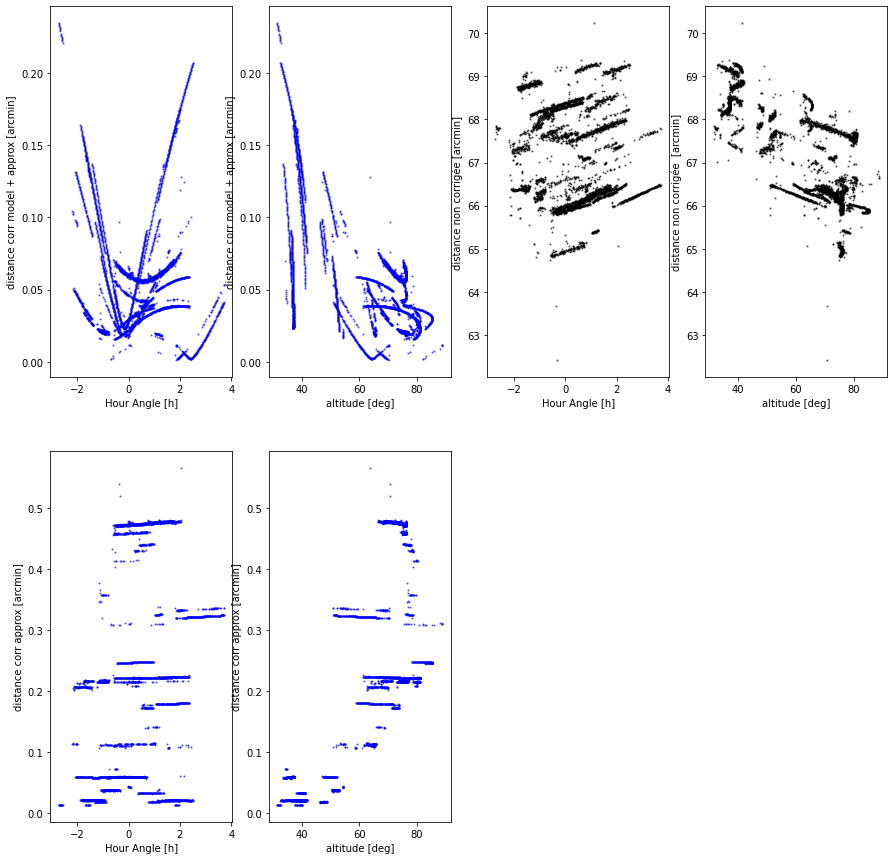

In [26]:
###Re-lecture du fichier d'informations
FILE=open("E://GPH//FRANCE//Stage//CODE//results_out_vieux_clean.txt")
ligne=FILE.readlines()
FILE.close()
delta_alpha = np.zeros(len(anglehorair),dtype=np.float64)
delta_delta = np.zeros(len(anglehorair),dtype=np.float64)
alpha_corr = np.zeros(len(anglehorair),dtype=np.float64)
delta_corr = np.zeros(len(anglehorair),dtype=np.float64)
alpha_model_corr = np.zeros(len(anglehorair),dtype=np.float64)
delta_model_corr = np.zeros(len(anglehorair),dtype=np.float64)
alpha_model_residu = np.zeros(len(anglehorair),dtype=np.float64)
delta_model_residu = np.zeros(len(anglehorair),dtype=np.float64)
alpha_residu = np.zeros(len(anglehorair),dtype=np.float64)
delta_residu = np.zeros(len(anglehorair),dtype=np.float64)
alpha_model = np.zeros(len(anglehorair),dtype=np.float64)
delta_model = np.zeros(len(anglehorair),dtype=np.float64)
disti = np.zeros(len(anglehorair),dtype=np.float64)
distance_test_func = np.zeros(len(anglehorair),dtype=np.float64)
dista_ori = np.zeros(len(anglehorair),dtype=np.float64)
astrometry_alt_corr = np.zeros(len(anglehorair),dtype=np.float64)
astrometry_HA_corr = np.zeros(len(anglehorair),dtype=np.float64)
astrometry_HA_corr_list=[]
astrometry_alt_mes = np.zeros(len(anglehorair),dtype=np.float64)
astrometry_az_mes = np.zeros(len(anglehorair),dtype=np.float64)

###Fonction approximant l'erreur en HA selon différents parmètres géométriques et de flexions
#• H0 Constante d’origine en angle horaire
#• D0 Constante d’origine en declinaison ´
#• CH erreur de collimation
#• NP erreur de perpendicularite de l’axe des d ´ eclinaisons et de l’axe horaire ´
#• MA erreur de position de l’axe horaire en azimuth
#• ME erreur de position de l’axe horaire en hauteur
#• FH flexion de l’axe horaire
#• FD flexion de l’axe delta
#• FT flexion du tube

def model_fit_ha_telescope(data, DO, HO, CH, NP, MA, ME, FH, FD, FT):
    dec_ofi,ha_ofi = data

    return  HO + CH * (1/np.cos(dec_ofi*np.pi/180)) + NP * np.tan(dec_ofi*np.pi/180) - MA * np.cos(ha_ofi*np.pi/180) * np.tan(dec_ofi*np.pi/180) + ME * np.sin(ha_ofi*np.pi/180) * np.tan(dec_ofi*np.pi/180) - FD * (np.cos(42.936872*np.pi/180) * np.cos(ha_ofi*np.pi/180) + np.sin(42.936872*np.pi/180) * np.tan(dec_ofi*np.pi/180)) + FT * np.cos(42.936872*np.pi/180) * np.sin(ha_ofi*np.pi/180) * (1/np.cos(dec_ofi*np.pi/180))

#popt_alpha_telescope,pcov_alpha_telescope = curve_fit(model_fit_ha_telescope,(DEC_true,anglehoraire_true*15),diff_RA)



###Fonction approximant l'erreur en DEC selon différents parmètres géométriques et de flexions (les mêmes que plus hauts)
def model_fit_dec_telescope(data, DO, HO, CH, NP, MA, ME, FH, FD, FT):
    dec_ofi,ha_ofi = data

    return  DO + MA * np.sin(ha_ofi*np.pi/180) + ME * np.cos(ha_ofi*np.pi/180) + FH * np.cos(ha_ofi*np.pi/180) + FT * (np.cos(42.936*np.pi/180) * np.cos(ha_ofi*np.pi/180) * np.sin(dec_ofi*np.pi/180) - np.sin(42.936*np.pi/180) * np.cos(dec_ofi*np.pi/180) )

#popt_delta_telescope,pcov_delta_telescope = curve_fit(model_fit_dec_telescope,(DEC_true,anglehoraire_true*15),diff_DEC)

###Fonction qui lie les deux fonctions pour trouver la distance grand cercle selon les approximations
def distance_grand_cercle(data, DO, HO, CH, NP, MA, ME, FH, FD, FT):
    dec_ofi,ha_ofi = data
    delta_dec = model_fit_dec_telescope((dec_ofi,ha_ofi), DO, HO, CH, NP, MA, ME, FH, FD, FT)
    delta_ha = model_fit_ha_telescope((dec_ofi,ha_ofi), DO, HO, CH, NP, MA, ME, FH, FD, FT)
    return np.append(delta_dec, delta_ha)

def fusion(x,y):
    return np.append(x,y)


for i in range(0,len(anglehorair)):
    
    #delta_alpha[i] = np.arcsin(np.cos(beta_alt_AH((altitude_true[i],anglehoraire_true[i]), *popt_beta)) * np.sin(omega_alt_AH((altitude_true[i],anglehoraire_true[i]), *popt_omega)) / np.cos(DEC_mes[i]*np.pi/180))
    ### Delta Alpha quand on prend les vrai valeurs de beta et omega plutôt que les approximations
    delta_alpha[i] = np.arcsin(np.cos(beta[i]) * np.sin(omega[i]) / np.cos(DEC_mes[i]*np.pi/180))
    
    #delta_delta[i] = (np.arctan((np.cos(0.5*(np.pi/2-beta_alt_AH((altitude_true[i],anglehoraire_true[i]), *popt_beta)-delta_alpha[i])) / np.cos(0.5*(np.pi/2-beta_alt_AH((altitude_true[i],anglehoraire_true[i]), *popt_beta)+delta_alpha[i]))) * np.tan(0.5*(np.pi/2-DEC_mes[i]*np.pi/180)))*2 - np.pi/2 - omega_alt_AH((altitude_true[i],anglehoraire_true[i]), *popt_omega))*(-1) - DEC_mes[i]*np.pi/180
    ### Delta Delta quand on prend les vrai valeurs de beta et omega plutôt que les approximations
    delta_delta[i] = (np.arctan((np.cos(0.5*(np.pi/2-beta[i]-delta_alpha[i])) / np.cos(0.5*(np.pi/2-beta[i]+delta_alpha[i]))) * np.tan(0.5*(np.pi/2-DEC_mes[i]*np.pi/180)))*2 - np.pi/2 - omega[i])*(-1) - DEC_mes[i]*np.pi/180
    

    alpha_corr[i] = RA_mes[i] + delta_alpha[i]*180/np.pi
    delta_corr[i] =  DEC_mes[i] - delta_delta[i]*180/np.pi
    
    alpha_residu[i] = RA_true[i] - alpha_corr[i]
    delta_residu[i] = DEC_true[i] - delta_corr[i]

    ###Distance avec les approximation beta omega
    disti[i] = np.sqrt(((RA_true[i] - alpha_corr[i])*np.cos(DEC_true[i]*np.pi/180)
               *(RA_true[i]  - alpha_corr[i])*np.cos(DEC_true[i]*np.pi/180))
               +((DEC_true[i] - delta_corr[i]) * (DEC_true[i] - delta_corr[i])))
    
    ###Distance sans correction
    dista_ori[i] = np.sqrt((diff_RA[i]*diff_RA[i])+(diff_DEC[i]*diff_DEC[i]))


### Calcul des deltas avec le model de pointage (9coeff) suite à l'approximation beta omega
popt_test,pcov_test = curve_fit(distance_grand_cercle,(DEC_true,anglehoraire_true*15),fusion(delta_residu,alpha_residu), maxfev=6000)
for j in range(0, len(anglehorair)):
    delta_model[j] = distance_grand_cercle((DEC_true[j],anglehoraire_true[j]*15),*popt_test)[0::2]
    delta_model_corr[j] = delta_corr[j] + delta_model[j]
    delta_model_residu[j] = DEC_true[j] - delta_model_corr[j]
    alpha_model[j] = distance_grand_cercle((DEC_true[j],anglehoraire_true[j]*15),*popt_test)[1::2]
    alpha_model_corr[j] = alpha_corr[j] + alpha_model[j]
    alpha_model_residu[j] = RA_true[j] - alpha_model_corr[j]
    distance_test_func[j] = np.sqrt(((RA_true[j] - alpha_model_corr[j])*np.cos(DEC_true[j]*np.pi/180)
                            *(RA_true[j]  - alpha_model_corr[j])*np.cos(DEC_true[j]*np.pi/180))
                            +((DEC_true[j] - delta_model_corr[j]) * (DEC_true[j] - delta_model_corr[j])))
print('DO, HO, CH, NP, MA, ME, FH, FD, FT', popt_test)

### Conversion en alt az 
for j in range(1, len(anglehorair)):
    donnees = ligne[j].split()
    string = donnees[0].replace(':',' ') + donnees[3].replace(',','')
    astrometry_time = Time([string])
    astrometry_coordinate_mes = SkyCoord(RA_mes[j-1],DEC_mes[j-1], unit='deg', frame='icrs')
    targetaltaz_mes = astrometry_coordinate_mes.transform_to(AltAz(obstime=astrometry_time,location=PicduMidi))

    astrometry_coordinate_corr = SkyCoord(alpha_model_corr[j-1],delta_model_corr[j-1], unit='deg', frame='icrs')
    targetaltaz_corr = astrometry_coordinate_corr.transform_to(AltAz(obstime=astrometry_time,location=PicduMidi))

    astrometry_alt_mes[j-1] = targetaltaz_mes.alt.deg
    astrometry_alt_corr[j-1] = targetaltaz_corr.alt.deg
    hourstring = str(astrometry_time)
    lst = SideralTime(astrometry_time)
    ha_corr = lst - astrometry_coordinate_corr.ra
    astrometry_HA_corr[j-1] = np.float64(ha_corr.wrap_at(12 * u.h).hourangle)

count = 0
for h in disti:
    if 0<= h*60 <= 1:
        count += 1
    else:
        pass
print('pourcentage bon, std :', (count/len(disti))*100, np.std(disti*60))
print()
plt.figure(figsize=(15,15))
### Graphiques prenant en compte l'approximation linéaire + l'équation 9coeff
fig = plt.subplot(2,4,1)
#plt.ylim(-1,2)
plt.scatter(anglehoraire_true,distance_test_func*60,s=5,marker='.',c='blue', alpha=0.5)
plt.xlabel('Hour Angle [h]')
plt.ylabel('distance corr model + approx [arcmin]')

fig = plt.subplot(2,4,2)
#plt.ylim(-1,4)
plt.scatter(altitude_true,distance_test_func*60,s=5,marker='.',c='blue', alpha=0.5)
plt.xlabel('altitude [deg]')
plt.ylabel('distance corr model + approx [arcmin]')

### Graphiques des données brutes sans ajustement
fig = plt.subplot(2,4,3)
#plt.ylim(-1,1)
plt.scatter(anglehoraire_true,dista_ori*60,s=5,marker='.',c='k', alpha=0.5)
plt.xlabel('Hour Angle [h]')
plt.ylabel('distance non corrigée [arcmin]')

fig = plt.subplot(2,4,4)
#plt.ylim(-1,1)
plt.scatter(altitude_true,dista_ori*60,s=5,marker='.',c='k', alpha=0.5)
plt.xlabel('altitude [deg]')
plt.ylabel('distance non corrigée  [arcmin]')

### Graphiques tenant en compte seulement les régressions linéaires (approximation beta omega)
fig = plt.subplot(2,4,5)
#plt.ylim(-2,4)
plt.scatter(anglehoraire_true,disti*60 ,s=5,marker='.',c='blue', alpha=0.5)
plt.xlabel('Hour Angle [h]')
plt.ylabel('distance corr approx [arcmin]')

fig = plt.subplot(2,4,6)
#plt.ylim(-2,4)
plt.scatter(altitude_true,disti*60,s=5,marker='.',c='blue', alpha=0.5)
plt.xlabel('altitude [deg]')
plt.ylabel('distance corr approx [arcmin]' )
plt.show()

[-3.08157545e-05  9.98555195e-04]


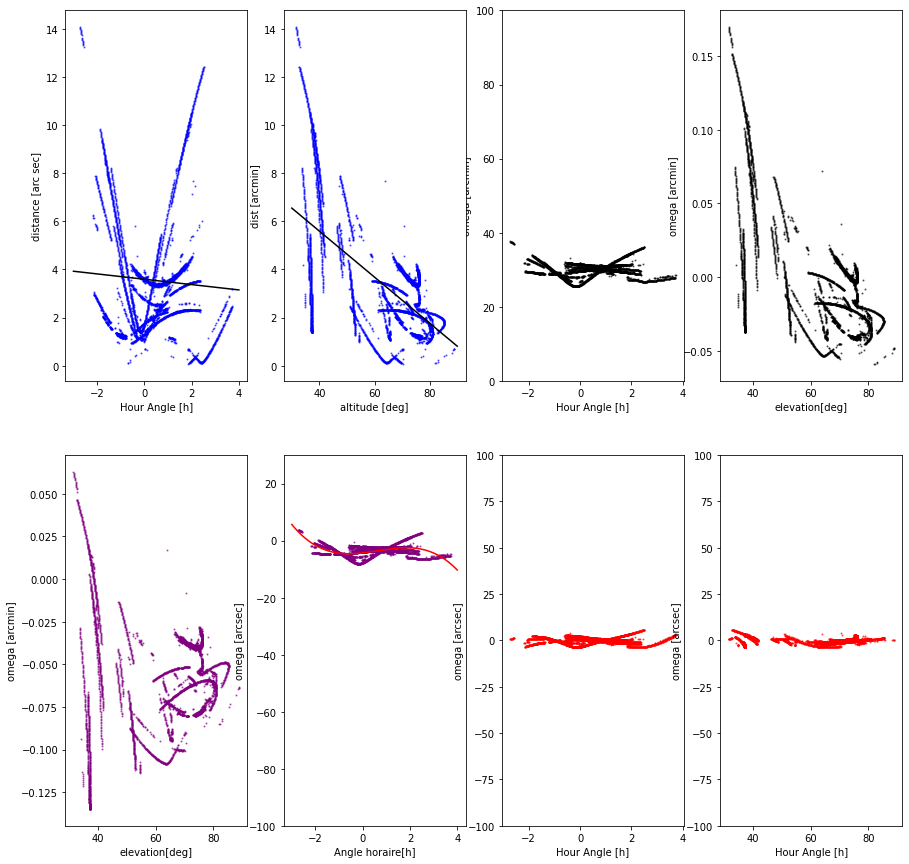

In [27]:
##Essai d'amélioration en soustrayant les droites en alt aux graphs en ha et ainsi de suite
def droite_distance_alt(x,a,b):
    return a*x+b
def droite_distance_hor(y,d,e):
    return d*y+e

def quad(z,t,u,l,b):
    return (t*z**3)+u*z**2+l*z+b

popt_dist,pcov_dist = curve_fit(droite_distance_alt,altitude_true,distance_test_func)
popt_dist_hor,pcov_dist_hor = curve_fit(droite_distance_hor,anglehoraire_true,distance_test_func)
popt_quad,pcov_quad = curve_fit(quad,anglehoraire_true,(distance_test_func - droite_distance_alt(altitude_true, *popt_dist) - droite_distance_hor(anglehoraire_true, *popt_dist_hor)))
print(popt_dist_hor)
plt.figure(figsize=(15,15))
fig = plt.subplot(2,4,3)
plt.ylim(0,100)
plt.scatter(anglehoraire_true,(distance_test_func - droite_distance_alt(altitude_true, *popt_dist))*3600+30,s=5,marker='.',c='black', alpha=0.5)

plt.xlabel('Hour Angle [h]')
plt.ylabel('omega [arcmin]')

fig = plt.subplot(2,4,2)
plt.scatter(altitude_true,distance_test_func*3600,s=5,marker='.',c='blue', alpha=0.5)
plt.plot(xaltitude,droite_distance_alt(xaltitude, *popt_dist)*3600,'k-')
plt.xlabel('altitude [deg]')
plt.ylabel('dist [arcmin]')

fig = plt.subplot(2,4,1)
#plt.ylim(0,100)
plt.scatter(anglehoraire_true,distance_test_func*3600,s=5,marker='.',c='blue', alpha=0.5)
plt.plot(xanglehoraire,droite_distance_hor(xanglehoraire, *popt_dist_hor)*3600,'k-')
plt.xlabel('Hour Angle [h]')
plt.ylabel('distance [arc sec]')

fig = plt.subplot(2,4,4)
#plt.ylim(-5,15)
plt.scatter(altitude_true,(distance_test_func - droite_distance_hor(anglehoraire_true, *popt_dist_hor))*60,s=5,marker='.',c='black', alpha=0.5)

plt.xlabel('elevation[deg]')
plt.ylabel('omega [arcmin]')

fig = plt.subplot(2,4,5)
#plt.ylim(-5,15)
plt.scatter(altitude_true,(distance_test_func - droite_distance_alt(altitude_true, *popt_dist) - droite_distance_hor(anglehoraire_true, *popt_dist_hor))*60,s=5,marker='.',c='purple', alpha=0.5)

plt.xlabel('elevation[deg]')
plt.ylabel('omega [arcmin]')

fig = plt.subplot(2,4,6)
plt.ylim(-100,30)
plt.scatter(anglehoraire_true,(distance_test_func - droite_distance_alt(altitude_true, *popt_dist) - droite_distance_hor(anglehoraire_true, *popt_dist_hor))*3600,s=5,marker='.',c='purple', alpha=0.5)
plt.plot(xanglehoraire,quad(xanglehoraire, *popt_quad)*3600,'r-')
plt.xlabel('Angle horaire[h]')
plt.ylabel('omega [arcsec]')


fig = plt.subplot(2,4,7)
plt.ylim(-100,100)
plt.scatter(anglehoraire_true,(distance_test_func - droite_distance_alt(altitude_true, *popt_dist) - droite_distance_hor(anglehoraire_true, *popt_dist_hor) - quad(anglehoraire_true, *popt_quad))*3600,s=5,marker='.',c='red', alpha=0.5)
plt.xlabel('Hour Angle [h]')
plt.ylabel('omega [arcsec]')

fig = plt.subplot(2,4,8)
plt.ylim(-100,100)
plt.scatter(altitude_true,(distance_test_func - droite_distance_alt(altitude_true, *popt_dist) - droite_distance_hor(anglehoraire_true, *popt_dist_hor) - quad(anglehoraire_true, *popt_quad))*3600,s=5,marker='.',c='red', alpha=0.5)
plt.xlabel('Hour Angle [h]')
plt.ylabel('omega [arcsec]')
plt.show()

Text(0.5, 1.0, 'Distance angulaire entre camera astrométrie et foyer cassegrain du TBL vs direction de pointage')

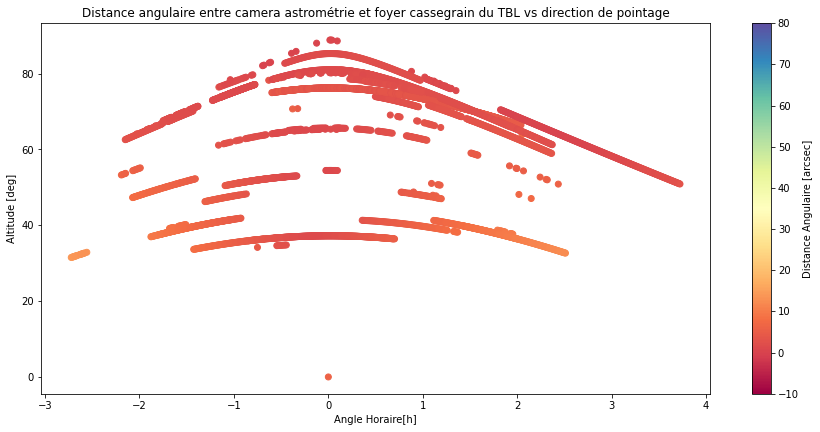

In [7]:
###Graphique "3d" de la distance grand cercle
plt.figure(figsize=(15,15))
fig = plt.subplot(2,1,1)
#plt.ylim(20,95)
plt.scatter(astrometry_HA_corr,astrometry_alt_corr, cmap='Spectral', vmin=-10, vmax=80, c=3600*(distance_test_func))
plt.colorbar(label='Distance Angulaire [arcsec]')
plt.xlabel('Angle Horaire[h]')
plt.ylabel('Altitude [deg]')
plt.title('Distance angulaire entre camera astrométrie et foyer cassegrain du TBL vs direction de pointage')

In [9]:
### Graphique 3d de la distance grand cercle après la correction d'approximation et le Wallace
trace = go.Scatter3d(
    x=altitude_true,  # <-- Put your data instead
    y=anglehoraire_true,  # <-- Put your data instead
    z=3600*(distance_test_func),  # <-- Put your data instead
    mode='markers',
    marker={'size': 3,'opacity': 0.8,'color':3600*(distance_test_func- droite_distance_alt(altitude_true, *popt_dist) - droite_distance_hor(anglehoraire_true, *popt_dist_hor) - quad(anglehoraire_true, *popt_quad)), 'colorscale':'Viridis'}
    
)

layout = go.Layout(
    margin={'l': 0, 'r': 0, 'b': 0, 't': 0}
)
data = [trace]
plot_figure = go.Figure(data=data, layout=layout)

plotly.offline.iplot(plot_figure)

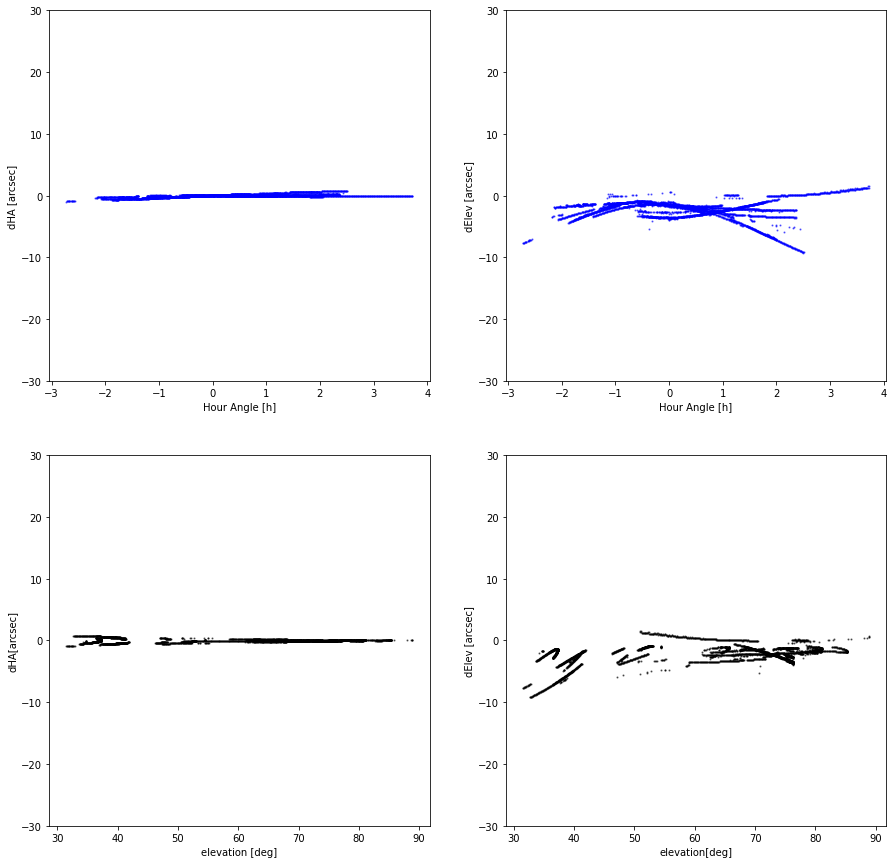

In [13]:
### Graphiques des erreurs résiduelles en HA et en élévation après l'approximation et le Wallace

plt.figure(figsize=(15,15))
fig = plt.subplot(2,2,1)
plt.ylim(-30,30)
plt.scatter(anglehoraire_true,(anglehoraire_true - astrometry_HA_corr)*3600,s=5,marker='.',c='blue', alpha=0.5)
plt.xlabel('Hour Angle [h]')
plt.ylabel('dHA [arcsec]')

fig = plt.subplot(2,2,2)
plt.scatter(anglehoraire_true,(altitude_true - astrometry_alt_corr)*3600,s=5,marker='.',c='blue', alpha=0.5)
plt.ylim(-30,30)
plt.xlabel('Hour Angle [h]')
plt.ylabel('dElev [arcsec]')

fig = plt.subplot(2,2,3)
plt.ylim(-30,30)
plt.scatter(altitude_true,(anglehoraire_true - astrometry_HA_corr)*3600,s=5,marker='.',c='black', alpha=0.5)
plt.xlabel('elevation [deg]')
plt.ylabel('dHA[arcsec]')

fig = plt.subplot(2,2,4)
plt.ylim(-30,30)
plt.scatter(altitude_true,(altitude_true - astrometry_alt_corr)*3600,s=5,marker='.',c='black', alpha=0.5)
plt.xlabel('elevation[deg]')
plt.ylabel('dElev [arcsec]')

plt.show()

[0.00592432 0.0084877 ]


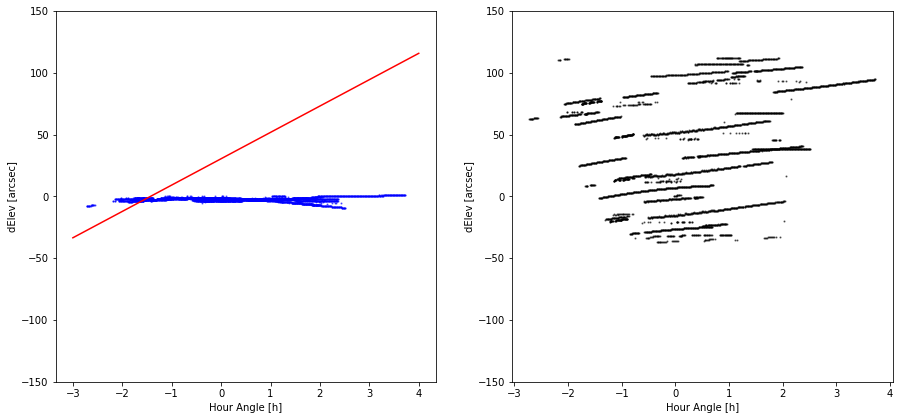

In [11]:
### Essai d'amélioration de l'erreur résiduelle en élévation
plt.figure(figsize=(15,15))
def droite_dE(x,a,b):
    return a*x+b
popt_dE,pcov_dE = curve_fit(droite_dE,anglehoraire_true,(altitude_true - astrometry_alt_corr))

fig = plt.subplot(2,2,1)
plt.scatter(anglehoraire_true,(altitude_true - astrometry_alt_corr)*3600,s=5,marker='.',c='blue', alpha=0.5)
plt.plot(xanglehoraire,droite_dE(xanglehoraire,*popt_dE)*3600,'r-')
plt.ylim(-150,150)
plt.xlabel('Hour Angle [h]')
plt.ylabel('dElev [arcsec]')

fig = plt.subplot(2,2,2)
plt.scatter(anglehoraire_true,(altitude_true - astrometry_alt_corr)*3600+(droite_dE(xanglehoraire,*popt_dE)*3600),s=5,marker='.',c='black', alpha=0.5)
plt.ylim(-150,150)
plt.xlabel('Hour Angle [h]')
plt.ylabel('dElev [arcsec]')
print(popt_dE)
